# Project Statistical Analysis

Karla y Mar

*Data Part Time Barcelona Dic 2019*

<img src="./img/5530085.jpeg" width="1000"> 

##  Importamos librería

In [132]:
import pandas as pd
import chart_studio.plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
from datetime import datetime
from ipywidgets import interact
import ipywidgets as wdg
import numpy as np
import scipy.stats as sp
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import cartopy
warnings.filterwarnings('ignore')
import plotly.offline as off
import json
import requests
from pandas.io.json import json_normalize
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
cf.go_offline()

## Importamos datos

###  API datos coronavirus a nivel mundial

In [21]:
url='https://api.covid19api.com/all'
response = requests.get(url, headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36"})
result=response.json()
df_coronavirus_raw = pd.DataFrame()
df_coronavirus_raw = json_normalize(result)
df_coronavirus_raw.head()

,Country,Province,Lat,Lon,Date,Cases,Status
0,,,0.0,0.0,0001-01-01T00:00:00Z,0,
1,Azerbaijan,,0.0,0.0,2020-02-28T00:00:00Z,1,confirmed
2,Azerbaijan,,0.0,0.0,2020-02-28T00:00:00Z,0,recovered
3,Azerbaijan,,0.0,0.0,2020-02-28T00:00:00Z,0,deaths
4,Afghanistan,,33.0,65.0,2020-02-24T00:00:00Z,1,confirmed


###  Continents by country

In [22]:
df_continents = pd.read_csv('./data/concap.csv')
df_continents.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


### Join corinavirus info and continent info

In [23]:
df_coronavirus_raw = df_coronavirus_raw.merge(df_continents, left_on='Country', right_on='CountryName')

###  Regional information

In [6]:
url='https://api.covid19tracking.narrativa.com/api?date_from=2020-03-10&date_to=2020-03-17'
response = requests.get(url, headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36"})
result=response.json()

In [7]:
result.keys()

dict_keys(['dates', 'metadata', 'total', 'updated_at'])

In [8]:
df_regions_raw = pd.DataFrame()
df_regions_raw = json_normalize(result)
df_regions_raw.head()

,updated_at,dates.2020-03-10.countries.Afghanistan.date,dates.2020-03-10.countries.Afghanistan.name,dates.2020-03-10.countries.Afghanistan.name_es,dates.2020-03-10.countries.Afghanistan.regions,dates.2020-03-10.countries.Afghanistan.today_confirmed,dates.2020-03-10.countries.Afghanistan.today_deaths,dates.2020-03-10.countries.Afghanistan.today_home_confinement,dates.2020-03-10.countries.Afghanistan.today_hospitalised_patients_with_symptoms,dates.2020-03-10.countries.Afghanistan.today_intensive_care,...,total.today_open_cases,total.today_recovered,total.today_vs_yesterday_confirmed,total.today_vs_yesterday_deaths,total.today_vs_yesterday_open_cases,total.today_vs_yesterday_recovered,total.yesterday_confirmed,total.yesterday_deaths,total.yesterday_open_cases,total.yesterday_recovered
0,2020-03-27 13:10UTC,2020-03-10,Afghanistan,Afganistán,[],5,0,0,0,0,...,107638,80562,0.097314,0.119972,0.146195,0.036207,178741,7085,93909,77747


In [9]:
#Datos de España
path = './data/data_output_covid19-cases-uci-deaths-by-ccaa-spain-by-day-accumulated.csv'
df_spain_deceased = pd.read_csv(path, sep=',')
df_spain_deceased.head()

,date,region_code,region,country,population,cases_registered,cases_per_100000,intensive_care,intensive_care_per_1000000,deceassed,deceassed_per_100000,recovered,recovered_per_100000
0,2020-02-27,1,Andalucía,Spain,8414240,1,0.01,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-28,1,Andalucía,Spain,8414240,6,0.07,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-29,1,Andalucía,Spain,8414240,8,0.10,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-01,1,Andalucía,Spain,8414240,12,0.14,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-02,1,Andalucía,Spain,8414240,12,0.14,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Datos de España, Italia y Francia
path = './data/data_output_covid19-countries-regions-compile.csv'
df_sp_it_fr_conf = pd.read_csv(path, sep=',')
df_sp_it_fr_conf.head()

,date,region_code,region,country,population,cases_registered,cases_per_100000,intensive_care,intensive_care_per_1000000,deceassed,deceassed_per_100000,recovered,recovered_per_100000
0,2020-02-27,1.0,Andalucía,Spain,8414240.0,1,0.01,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-28,1.0,Andalucía,Spain,8414240.0,6,0.07,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-29,1.0,Andalucía,Spain,8414240.0,8,0.10,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-01,1.0,Andalucía,Spain,8414240.0,12,0.14,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-02,1.0,Andalucía,Spain,8414240.0,12,0.14,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Datos de camas UCI
path = './data/ccaa_camas_uci_2017.csv'
df_camas_uci = pd.read_csv(path, sep=',')
df_camas_uci.head()

,cod_ine,CCAA,Públicos,Privados,Total
0,1,ANDALUCÍA,572,162,734
1,2,ARAGÓN,113,22,135
2,3,ASTURIAS,86,7,93
3,15,C. FORAL DE NAVARRA,46,19,65
4,5,CANARIAS,187,50,237


In [12]:
#Datos de mascarillas entregadas
path = './data/ccaa_covid19_mascarillas.csv'
df_mascarillas = pd.read_csv(path, sep=',')
df_mascarillas.head()

,fecha,cod_ine,CCAA,mascarillas_acumulado_desde_2020-03-10
0,2020-03-22,1.0,ANDALUCÍA,444083
1,2020-03-22,2.0,ARAGÓN,72455
2,2020-03-22,3.0,ASTURIAS,60229
3,2020-03-22,4.0,BALEARES,49476
4,2020-03-22,5.0,CANARIAS,124165


In [13]:
#Datos por rangos de edad
path = './data/nacional_covid19_rango_edad.csv'
df_edades = pd.read_csv(path, sep=',')
df_edades.head()

,fecha,rango_edad,sexo,casos_confirmados,hospitalizados,ingresos_uci,fallecidos
0,2020-03-23,0-9,ambos sexos,129,34,1,0
1,2020-03-23,10-19,ambos sexos,221,15,0,1
2,2020-03-23,20-29,ambos sexos,1285,183,8,4
3,2020-03-23,30-39,ambos sexos,2208,365,15,3
4,2020-03-23,40-49,ambos sexos,2919,663,40,9


## Data cleaning

### Cases by country

####  Renombramos columnas y estandarizamos nombres

In [24]:
df_coronavirus_raw.columns = df_coronavirus_raw.columns.str.replace('[.]','_').str.lower()
df_coronavirus_raw = df_coronavirus_raw.rename(columns = {'lat':'latitude', 'lon':'longitude', 'capitalname':'capital', 
                                                         'capitallatitude':'capital_latitude', 'capitallongitude':'capital_longitude',
                                                         'countrycode':'country_code', 'continentname':'continent'})
df_coronavirus_raw.head()

,country,province,latitude,longitude,date,cases,status,countryname,capital,capital_latitude,capital_longitude,country_code,continent
0,Afghanistan,,33.0,65.0,2020-02-24T00:00:00Z,1,confirmed,Afghanistan,Kabul,34.516667,69.183333,AF,Asia
1,Afghanistan,,33.0,65.0,2020-02-24T00:00:00Z,0,recovered,Afghanistan,Kabul,34.516667,69.183333,AF,Asia
2,Afghanistan,,33.0,65.0,2020-02-24T00:00:00Z,0,deaths,Afghanistan,Kabul,34.516667,69.183333,AF,Asia
3,Afghanistan,,0.0,0.0,2020-02-24T00:00:00Z,1,confirmed,Afghanistan,Kabul,34.516667,69.183333,AF,Asia
4,Afghanistan,,0.0,0.0,2020-02-24T00:00:00Z,0,recovered,Afghanistan,Kabul,34.516667,69.183333,AF,Asia


#### Eliminamos columnas duplicadas

In [25]:
df_coronavirus_raw.drop('countryname', axis=1, inplace=True)

#### Obtenemos los totales por países y calculamos las estadísticas

- Los casos existentes se han calculado de la siguiente manera :    
         casos existentes = casos confirmados - fallecidos - recuperados
- La columna <CODE>'days_confirmed'</CODE> nos crea un contador a partir de los 100 casos confirmados.
- La columna <CODE>'days_deaths'</CODE> nos crea un contador a partir de los 10 casos confirmados.
- La columna <CODE>'days_recovered'</CODE> nos crea un contador a partir de los 100 casos confirmados.
- La columna <CODE>'estimated'</CODE> nos da una aproximación de los posibles casos que hay teniendo en cuanta la mortalidad.
         casos estimados = fallecidos * 99

In [50]:
df_coronavirus_raw['class'] = np.where(df_coronavirus_raw.country.str.contains('China'), 'China', 'Other Countries')
df_coronavirus_raw['date'] = pd.to_datetime(df_coronavirus_raw['date'], format="%Y-%m-%dT%H:%M:%SZ")
l_index = ['class','country', 'province', 'latitude','longitude', 'date','continent']
df_coronavirus = pd.pivot_table(df_coronavirus_raw, values='cases', 
                index = l_index, columns=['status'],
                aggfunc=np.sum, fill_value=0).reset_index()

df_coronavirus.head()

status,class,country,province,latitude,longitude,date,continent,confirmed,deaths,recovered
0,China,China,Anhui,31.8257,117.226,2020-01-22,Asia,1,0,0
1,China,China,Anhui,31.8257,117.226,2020-01-23,Asia,9,0,0
2,China,China,Anhui,31.8257,117.226,2020-01-24,Asia,15,0,0
3,China,China,Anhui,31.8257,117.226,2020-01-25,Asia,39,0,0
4,China,China,Anhui,31.8257,117.226,2020-01-26,Asia,60,0,0


In [51]:
df_countries = df_coronavirus.groupby(['class','continent','country','date'])['confirmed','deaths', 'recovered'].agg('sum').reset_index()
df_countries['existing'] = df_countries.confirmed.fillna(0) -  df_countries.deaths.fillna(0) - df_countries.recovered.fillna(0)

In [52]:
df_countries['days_confirmed'] = df_countries[df_countries['confirmed']>100].groupby(['country']).cumcount()+1
df_countries['days_confirmed'] = df_countries['days_confirmed'].fillna(0).astype('int')

In [53]:
df_countries['days_death'] = df_countries[df_countries['deaths']>10].groupby(['country']).cumcount()+1
df_countries['days_death'] = df_countries['days_death'].fillna(0).astype('int')

In [54]:
df_countries['days_recovered'] = df_countries[df_countries['recovered']>100].groupby(['country']).cumcount()+1
df_countries['days_recovered'] = df_countries['days_recovered'].fillna(0).astype('int')

In [55]:
df_countries['estimated'] = [confirmed*99 for confirmed in df_countries['confirmed']]

In [56]:
df_countries.head()

status,class,continent,country,date,confirmed,deaths,recovered,existing,days_confirmed,days_death,days_recovered,estimated
0,China,Asia,China,2020-01-22,548,17,28,503,1,1,0,54252
1,China,Asia,China,2020-01-23,643,18,30,595,2,2,0,63657
2,China,Asia,China,2020-01-24,920,26,36,858,3,3,0,91080
3,China,Asia,China,2020-01-25,1406,42,39,1325,4,4,0,139194
4,China,Asia,China,2020-01-26,2075,56,49,1970,5,5,0,205425


#### Ordenamos columas

In [57]:
column_order = ['date', 'continent', 'country','days_confirmed', 'days_death','days_recovered','confirmed', 'recovered', 'existing', 'estimated','deaths']
df_countries = df_countries[column_order]
df_countries.head()

status,date,continent,country,days_confirmed,days_death,days_recovered,confirmed,recovered,existing,estimated,deaths
0,2020-01-22,Asia,China,1,1,0,548,28,503,54252,17
1,2020-01-23,Asia,China,2,2,0,643,30,595,63657,18
2,2020-01-24,Asia,China,3,3,0,920,36,858,91080,26
3,2020-01-25,Asia,China,4,4,0,1406,39,1325,139194,42
4,2020-01-26,Asia,China,5,5,0,2075,49,1970,205425,56


## Visualización

### Comparación de la evolución de casos entre dos países

In [58]:
col_vars = ['confirmed','deaths', 'recovered', 'existing']
cou_vars = list(df_countries['country'].unique())

def make_hist(country1='Italy', country2='Spain'):
    fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=(country1, country2))
    for x in range(0,len(col_vars)):
        df_filtered = df_countries[df_countries['country']==country1]
        fig.add_trace(go.Scatter( \
                      x = df_filtered['date'], \
                      y = df_filtered[col_vars[x]], \
                      mode = 'lines+markers',
                      name = f'{country1} - {col_vars[x].capitalize()}'),
                      row=1, col=1)
        df_filtered2 = df_countries[df_countries['country']==country2]
        fig.add_trace(go.Scatter( \
                      x = df_filtered2['date'], \
                      y = df_filtered2[col_vars[x]], \
                      mode = 'lines+markers',
                      name = f'{country2} - {col_vars[x].capitalize()}'),
                      row=1, col=2)
        
    fig.update_layout(height=500, width=1000, title_text=f'Evolución de casos {country1} vs. {country2}', title_x=0.5)
    fig.show()
                      
_= interact(make_hist, country1 = cou_vars, country2 = cou_vars)

interactive(children=(Dropdown(description='country1', index=123, options=('China', 'Algeria', 'Angola', 'Beni…

In [59]:
def make_hist(country1='Italy', country2='Spain'):
    nrows = 2
    ncols = nrows
    fig = make_subplots(rows=2, cols=2, subplot_titles=col_vars)
    for c in range(0,len(col_vars)):
        df_filtered = df_countries[df_countries['country']==country1]
        fig.add_trace(go.Scatter( \
                      x = df_filtered['days_confirmed'], \
                      y = df_filtered[col_vars[c]], \
                      mode = 'lines+markers',
                      name = f'{country1} - {col_vars[c].capitalize()}'),
                      row=int(c/nrows)+1, col=(c%ncols)+1)
        df_filtered2 = df_countries[df_countries['country']==country2]
        fig.add_trace(go.Scatter( \
                      x = df_filtered2['days_confirmed'], \
                      y = df_filtered2[col_vars[c]], \
                      mode = 'lines+markers',
                      name = f'{country2} - {col_vars[c].capitalize()}'),
                      row=int(c/nrows)+1, col=(c%ncols)+1)
        
    fig.update_layout(height=1000, width=1000, title_text=f'Evolución de casos {country1} vs. {country2}', title_x=0.5)
    fig.show()
                      
_= interact(make_hist, country1 = cou_vars, country2 = cou_vars)

interactive(children=(Dropdown(description='country1', index=123, options=('China', 'Algeria', 'Angola', 'Beni…

###  Casos confirmados de coronavirus: Estadísticas

In [60]:
df_countries_top10 = df_countries.groupby('date',group_keys=False)\
            .apply(lambda grp:grp.nlargest(n=int(10),columns='confirmed').sort_index()).reset_index()
df_countries_top10.head()

status,index,date,continent,country,days_confirmed,days_death,days_recovered,confirmed,recovered,existing,estimated,deaths
0,0,2020-01-22,Asia,China,1,1,0,548,28,503,54252,17
1,801,2020-01-22,Asia,Hong Kong,0,0,0,0,0,0,0,0
2,1035,2020-01-22,Asia,Japan,0,0,0,2,0,2,198,0
3,1218,2020-01-22,Asia,Macau,0,0,0,1,0,1,99,0
4,1668,2020-01-22,Asia,South Korea,0,0,0,1,0,1,99,0


In [61]:
fig = px.box(df_countries_top10, y="confirmed", x='class', 
             labels={'confirmed': f'Confirmed cases of Coronavirus',
            'class':'Agrupation by countries: China vs. Rest of the world'},
             points="all")
fig.update_layout(title_text="Stats of confirmed cases: China vs. Rest of world", title_x=0.5)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['index', 'date', 'continent', 'country', 'days_confirmed', 'days_death', 'days_recovered', 'confirmed', 'recovered', 'existing', 'estimated', 'deaths'] but received: class

## Estadísticas

### Funciones

In [117]:
def hipotesis_result (pval, conf):
    
    """
    ************************************Contraste de hipótesis************************************
    
    Devuelve la decisión de rechazar o no la hipótesis nula dados el p-valor y el nivel de confianza.
    
    Input:
    * pval(float): P-valor. Probabilidad de que un valor sea posible dada una hipótesis nula cierta.
    * conf(float) : Nivel de confianza deseado.
    
    Output:
    * (str): Si se acepta o rechaza la H0 y los valores'pval' y 'conf' introducidos.
    
    ***********************************************************************************************
    
    """
    alpha = 1 - conf
    if pval <= alpha:
        return f'Se rechaza la hipótesis nula (H0). Nuestro p-valor {pval} es menor a nuestra α {round(alpha,2)}'
    else:
        return f'No se rechaza la hipótesis nula (H0). Nuestro p-valor {pval} es mayor a nuestra α {round(alpha,2)}'



def model_summary (x, y):
    
    from statsmodels.regression import linear_model as sm
    
    """
    ************************************Sumario************************************
    
    Devuelve la sumarización de diferentes estadísticos.
    
    Input:
    * X: muestra 1
    * Y: muestra 2

    
    Output:
    * Listado de estadísticos.
    
    ***********************************************************************************************
    
    """
    model = sm.OLS(y.astype(float), y.astype(float)).fit()

    print(model.summary())
    

def linear_reg (x, y, dataset):
    
    linear_regression = LinearRegression()
    linear_regression.fit(x,y)
    y_pred = linear_regression.predict(x)
    sns.lmplot("x","y", data = dataset)
    
    
    
def expon_distribution ():
    return 1 - stats.expon(1/10).cdf(15)


def t_test_features(s1, s2, conf, features=['confirmed','deaths', 'recovered', 'existing', 'estimated']):
    
    """
    La prueba 't de Student' se aplica cuando la población estudiada sigue una 
    distribución normal pero el tamaño muestral es demasiado pequeño como para 
    que el estadístico en el que está basada la inferencia esté normalmente 
    distribuido, utilizándose una estimación de la desviación típica en lugar del 
    valor real. Es utilizado en análisis discriminante.
    
    Calculate the T-test for the means of two independent samples of scores.

    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the populations
    have identical variances by default.
    
    Args:
        s1 (dataframe): sample 1
        s2 (dataframe): sample 2
        features (list): an array of features to test
    
    Returns:
        dict: a dictionary of t-test scores for each feature where the feature name
        is the key and the p-value is the value
    """
    
    results = {}
    
    # Your code here
    
    for feat in features:
        c = sp.ttest_ind(s1[feat], s2[feat])[1]
        results[feat] = hipotesis_result(c,conf)
    
    return results


In [118]:
def poly_reg (country, days_predict):
    
    """
    La regresión polinómica es una predicción de una variable de 
    respuesta cuantitativa a partir de una variable predictora 
    cuantitativa, donde la relación se modela como una función 
    polinomial de orden n.
    
    Args:
        country: país a predecir
        days_predict: hasta que día

    
    Returns:
        plot con la predicción.
        
    """
    
    selection = df_countries[df_countries['country'] == country]
    X = selection['days_confirmed'].values
    y = selection['deaths'].values
    mymodel = np.poly1d(np.polyfit(X, y, 3))
    myline = np.linspace(1, days_predict, 100)
    plt.plot(myline, mymodel(myline))
    plt.title(country)
    plt.xlabel("Días desde los primeros 10 muertos")
    plt.ylabel("Número de muertos")
    plt.scatter(X,y, color = "red")
    return plt.show()

In [122]:
def umann_whitney_features(s1, s2, conf, features):
    
    """
    La prueba U de MannWhitney es una prueba no paramétrica aplicada a dos muestras independientes. Es la versión 
    no paramétrica de la habitual prueba t de Student.
    
    Args:
        s1 (dataframe): sample 1
        s2 (dataframe): sample 2
        features (list): an array of features to test
    
    Returns:
        dict: a dictionary of t-test scores for each feature where the feature name
        is the key and the p-value is the value
    """
    
    results = {}
    
    # Your code here
    
    for feat in features:
        c = sp.stats.mannwhitneyu(s1[feat], s2[feat])[1]
        results[feat] = hipotesis_result(c,conf)
    
    return results

### España vs Italia

In [64]:
df_countries.head()

status,date,continent,country,days_confirmed,days_death,days_recovered,confirmed,recovered,existing,estimated,deaths
0,2020-01-22,Asia,China,1,1,0,548,28,503,54252,17
1,2020-01-23,Asia,China,2,2,0,643,30,595,63657,18
2,2020-01-24,Asia,China,3,3,0,920,36,858,91080,26
3,2020-01-25,Asia,China,4,4,0,1406,39,1325,139194,42
4,2020-01-26,Asia,China,5,5,0,2075,49,1970,205425,56


In [65]:
corona_spain = df_countries[df_countries['country'] == "Spain"]
corona_spain = corona_spain[corona_spain['days_confirmed']>=1]
corona_it = df_countries[df_countries['country'] == "Italy"]
corona_it = corona_it[corona_it['days_confirmed']>=1]
corona_spain.head()

status,date,continent,country,days_confirmed,days_death,days_recovered,confirmed,recovered,existing,estimated,deaths
3606,2020-03-02,Europe,Spain,1,0,0,120,2,118,11880,0
3607,2020-03-03,Europe,Spain,2,0,0,165,2,162,16335,1
3608,2020-03-04,Europe,Spain,3,0,0,222,2,218,21978,2
3609,2020-03-05,Europe,Spain,4,0,0,259,2,254,25641,3
3610,2020-03-06,Europe,Spain,5,0,0,400,2,393,39600,5


In [123]:
features=['confirmed','deaths', 'recovered', 'existing', 'estimated']
t_test_features(corona_spain,corona_it, 0.95, features)

{'confirmed': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor 0.15276583662951174 es mayor a nuestra α 0.05',
 'deaths': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor 0.05240802942803716 es mayor a nuestra α 0.05',
 'recovered': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor 0.10231793729197025 es mayor a nuestra α 0.05',
 'existing': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor 0.1826508723517132 es mayor a nuestra α 0.05',
 'estimated': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor 0.15276583662951174 es mayor a nuestra α 0.05'}

In [126]:
umann_whitney_features(corona_spain,corona_it, 0.95, features)

{'confirmed': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor 0.10171314378796698 es mayor a nuestra α 0.05',
 'deaths': 'Se rechaza la hipótesis nula (H0). Nuestro p-valor 0.04277021930155687 es menor a nuestra α 0.05',
 'recovered': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor 0.06674286185879226 es mayor a nuestra α 0.05',
 'existing': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor 0.11332674526762082 es mayor a nuestra α 0.05',
 'estimated': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor 0.10171314378796698 es mayor a nuestra α 0.05'}

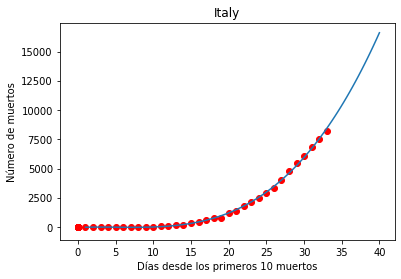

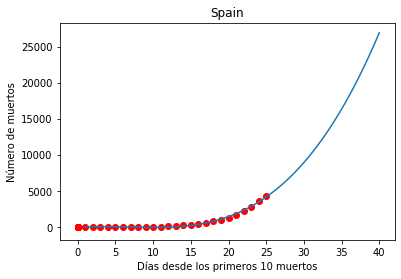

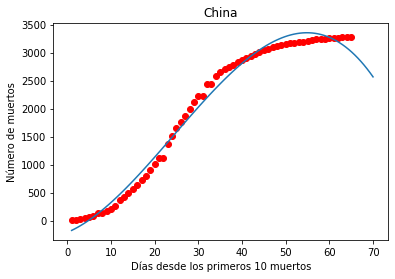

In [90]:
poly_reg("Italy", 40)
poly_reg("Spain", 40)
poly_reg("China", 70)

In [160]:
df_sp_it_fr_conf.head()

,date,region_code,region,country,population,cases_registered,cases_per_100000,intensive_care,intensive_care_per_1000000,deceassed,deceassed_per_100000,recovered,recovered_per_100000
0,2020-02-27,1.0,Andalucía,Spain,8414240.0,1,0.01,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-28,1.0,Andalucía,Spain,8414240.0,6,0.07,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-29,1.0,Andalucía,Spain,8414240.0,8,0.10,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-01,1.0,Andalucía,Spain,8414240.0,12,0.14,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-02,1.0,Andalucía,Spain,8414240.0,12,0.14,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.pivot_table(df_sp_it_fr_conf, index = ['date','country', 'region'])

In [139]:
df_sp_it_fr_conf = df_sp_it_fr_conf.fillna(0)

Index(['date', 'region_code', 'region', 'country', 'population',
       'cases_registered', 'cases_per_100000', 'intensive_care',
       'intensive_care_per_1000000', 'deceassed', 'deceassed_per_100000',
       'recovered', 'recovered_per_100000'],
      dtype='object')

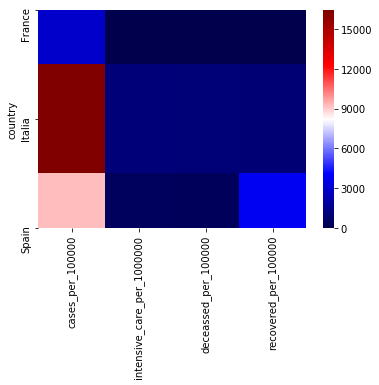

In [178]:
_ = sns.heatmap(pd.pivot_table(df_sp_it_fr_conf, index = 'country', aggfunc = "sum")[['cases_per_100000',
       'intensive_care_per_1000000', 'deceassed_per_100000','recovered_per_100000']], cmap= "seismic")

In [182]:
df_italia = df_sp_it_fr_conf[df_sp_it_fr_conf['country'] == "Italia"]
df_spain = df_sp_it_fr_conf[df_sp_it_fr_conf['country'] == "Spain"]
df_italia

,date,region_code,region,country,population,cases_registered,cases_per_100000,intensive_care,intensive_care_per_1000000,deceassed,deceassed_per_100000,recovered,recovered_per_100000
513,2020-02-24,13.0,Abruzzo,Italia,1311580.0,0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
514,2020-03-20,13.0,Abruzzo,Italia,1311580.0,449,34.23,48.0,3.66,17.0,1.30,10.0,0.76
515,2020-02-26,13.0,Abruzzo,Italia,1311580.0,0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
516,2020-03-22,13.0,Abruzzo,Italia,1311580.0,587,44.76,49.0,3.74,33.0,2.52,15.0,1.14
517,2020-03-24,13.0,Abruzzo,Italia,1311580.0,689,52.53,57.0,4.35,46.0,3.51,21.0,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,2020-02-24,5.0,Veneto,Italia,4905854.0,33,0.67,4.0,0.08,1.0,0.02,0.0,0.00
1139,2020-02-26,5.0,Veneto,Italia,4905854.0,71,1.45,8.0,0.16,2.0,0.04,0.0,0.00
1140,2020-03-22,5.0,Veneto,Italia,4905854.0,5122,104.41,255.0,5.20,169.0,3.44,309.0,6.30
1141,2020-02-28,5.0,Veneto,Italia,4905854.0,151,3.08,9.0,0.18,2.0,0.04,0.0,0.00


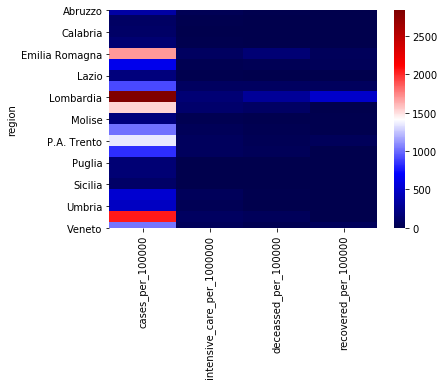

In [183]:
_ = sns.heatmap(pd.pivot_table(df_italia, index = 'region', aggfunc = "sum")[['cases_per_100000',
       'intensive_care_per_1000000', 'deceassed_per_100000','recovered_per_100000']], cmap= "seismic")

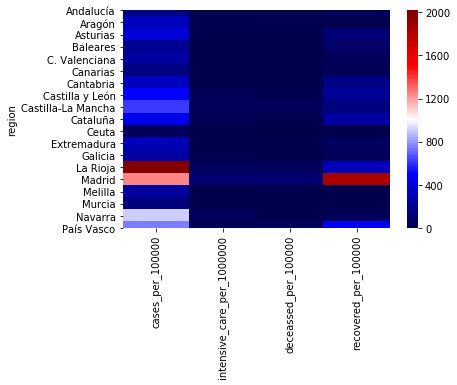

In [184]:
_ = sns.heatmap(pd.pivot_table(df_spain, index = 'region', aggfunc = "sum")[['cases_per_100000',
       'intensive_care_per_1000000', 'deceassed_per_100000','recovered_per_100000']], cmap= "seismic")

In [128]:
features = ['population','cases_registered', 'cases_per_100000', 'intensive_care',
       'intensive_care_per_1000000', 'deceassed', 'deceassed_per_100000',
       'recovered', 'recovered_per_100000']
t_test_features(df_italia,df_spain, 0.95, features)

{'population': 'Se rechaza la hipótesis nula (H0). Nuestro p-valor 0.0071696736956657625 es menor a nuestra α 0.05',
 'cases_registered': 'Se rechaza la hipótesis nula (H0). Nuestro p-valor 0.0010190190854473874 es menor a nuestra α 0.05',
 'cases_per_100000': 'Se rechaza la hipótesis nula (H0). Nuestro p-valor 0.0021124817444507006 es menor a nuestra α 0.05',
 'intensive_care': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor nan es mayor a nuestra α 0.05',
 'intensive_care_per_1000000': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor nan es mayor a nuestra α 0.05',
 'deceassed': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor nan es mayor a nuestra α 0.05',
 'deceassed_per_100000': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor nan es mayor a nuestra α 0.05',
 'recovered': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor nan es mayor a nuestra α 0.05',
 'recovered_per_100000': 'No se rechaza la hipótesis nula (H0). Nuestro p-valor nan es mayor a nues

In [129]:
umann_whitney_features(df_italia,df_spain, 0.95, features)

{'population': 'Se rechaza la hipótesis nula (H0). Nuestro p-valor 0.011833875648218998 es menor a nuestra α 0.05',
 'cases_registered': 'Se rechaza la hipótesis nula (H0). Nuestro p-valor 0.00011137933338245613 es menor a nuestra α 0.05',
 'cases_per_100000': 'Se rechaza la hipótesis nula (H0). Nuestro p-valor 0.001964282750411965 es menor a nuestra α 0.05',
 'intensive_care': 'Se rechaza la hipótesis nula (H0). Nuestro p-valor 1.0900800148354772e-25 es menor a nuestra α 0.05',
 'intensive_care_per_1000000': 'Se rechaza la hipótesis nula (H0). Nuestro p-valor 1.207705569214431e-27 es menor a nuestra α 0.05',
 'deceassed': 'Se rechaza la hipótesis nula (H0). Nuestro p-valor 2.7938397740533565e-05 es menor a nuestra α 0.05',
 'deceassed_per_100000': 'Se rechaza la hipótesis nula (H0). Nuestro p-valor 1.1764045192421385e-05 es menor a nuestra α 0.05',
 'recovered': 'Se rechaza la hipótesis nula (H0). Nuestro p-valor 6.413817709213436e-115 es menor a nuestra α 0.05',
 'recovered_per_10000